In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted

In [2]:
# Define the wrangle function
def wrangle(filepath):
    # Import CSV
    df = pd.read_csv(filepath)
    
    # Remove outlier
    low, high = df["median_house_value"].quantile([0.1, 0.9])
    mask = df["median_house_value"].between(low, high)
    
    df = df[mask]
    
    return df

In [5]:
#Import data using the define wrangle function
df = wrangle("data/California_housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
...,...,...,...,...,...,...,...,...,...,...
20633,-121.53,39.19,27,2080,412.0,1082,382,2.5495,INLAND,98300
20634,-121.56,39.27,28,2332,395.0,1041,344,3.7125,INLAND,116800
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16516 entries, 1 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16516 non-null  float64
 1   latitude            16516 non-null  float64
 2   housing_median_age  16516 non-null  int64  
 3   total_rooms         16516 non-null  int64  
 4   total_bedrooms      16347 non-null  float64
 5   population          16516 non-null  int64  
 6   households          16516 non-null  int64  
 7   median_income       16516 non-null  float64
 8   ocean_proximity     16516 non-null  object 
 9   median_house_value  16516 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.4+ MB


In [8]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700


In [ ]:
# Use plotly express to create figure
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat="latitude",
    lon="longitude",
    width=600,  # Width of map
    height=600,  # Height of map
    hover_data=["median_house_value"],  # Display price when hovering mouse over house

)
# Add mapbox_style to figure layout
fig.update_layout(mapbox_style="open-street-map")

# Show figure
fig.show()

In [7]:
# Create 3D scatter plot
fig = px.scatter_3d(
    df,
    x="longitude",
    y="latitude",
    z="median_house_value",
    labels={"lon": "longitude", "lat": "latitude", "median_house_value": "median_house_value"},
    width=600,
    height=500,
)

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

# Display figure
fig.show()

In [8]:
# Check the statistical details of the data
df["median_house_value"].describe().apply("{0:,.0f}".format)

count     16,516
mean     192,764
std       74,496
min       82,300
25%      133,975
50%      179,700
75%      241,925
max      376,600
Name: median_house_value, dtype: object

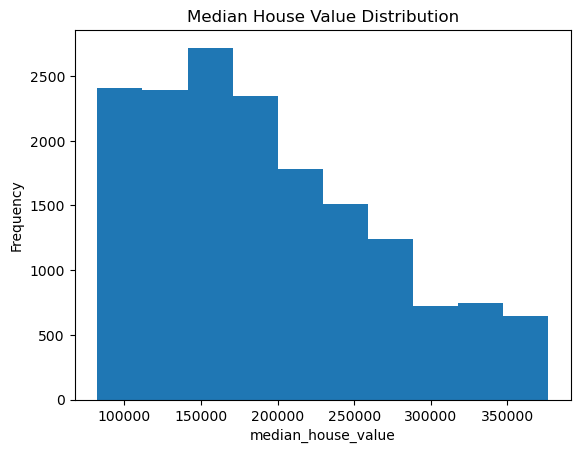

In [9]:
# Plot the histogram using matplotlib
plt.hist(df["median_house_value"])
plt.xlabel("median_house_value")
plt.ylabel("Frequency")
plt.title("Median House Value Distribution");

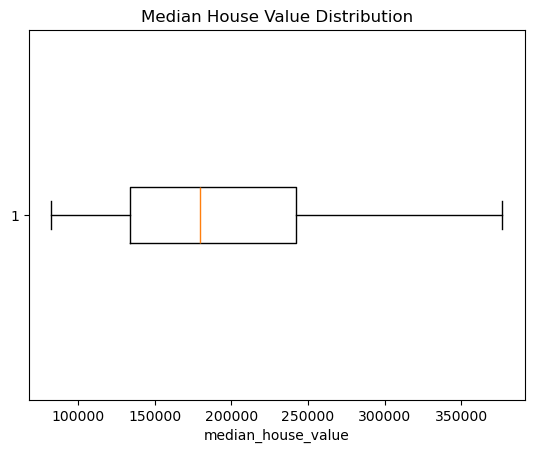

In [10]:
# Plot the boxplot using matplolib
plt.boxplot(df["median_house_value"], vert=False)
plt.xlabel("median_house_value")
plt.title("Median House Value Distribution");

In [11]:
# Remove outliers
#low, high = df["median_house_value"].quantile([0.1, 0.9])
#mask = df["median_house_value"].between(low, high)

In [12]:
# Split the data into features and target
features = ["longitude", "latitude"]
target = "median_house_value"

X=df[features]
y=df[target]

In [13]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

y_train.shape

(3303,)

In [14]:
y_mean = y_train.mean()
y_mean

np.float64(192782.62185891613)

In [15]:
y_pred_baseline= [y_mean] * len(y_train)
y_pred_baseline[:5]

[np.float64(192782.62185891613),
 np.float64(192782.62185891613),
 np.float64(192782.62185891613),
 np.float64(192782.62185891613),
 np.float64(192782.62185891613)]

In [16]:
Mae_Baseline = mean_absolute_error(y_train, y_pred_baseline )

print("Mae_Baseline:", round(Mae_Baseline, 2))

Mae_Baseline: 61328.08


In [17]:
model = LinearRegression()

In [18]:
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([193278.15809301, 198550.36093571, 187874.12967032, 196783.73687743,
       202148.70844799])

In [20]:
mae_training = mean_absolute_error(y_train, y_pred_training)
print(f"MAE Training:", round(mae_training, 2))

MAE Training: 53341.31


In [21]:
y_pred_test = pd.Series(model.predict(X_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f"MAE Test:", round(mae_test, 2))

MAE Test: 53924.36


In [22]:
intercept = model.intercept_.round()
intercept

np.float64(-3712202.0)

In [23]:
coefficient = model.coef_.round()
coefficient

array([-45447., -42965.])

In [24]:
print (f"Mean apartment prices = {intercept} + ({coefficient[0]}* Longitude)  + ({coefficient[1]}*latitude)")

Mean apartment prices = -3712202.0 + (-45447.0* Longitude)  + (-42965.0*latitude)


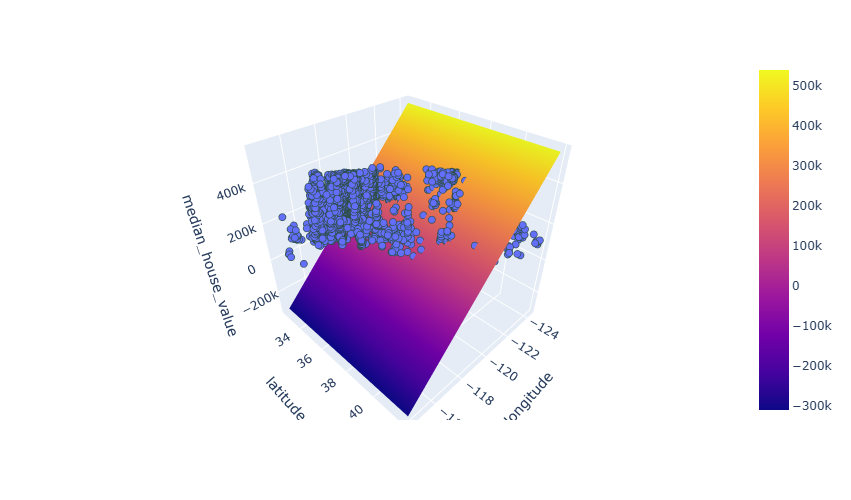

In [25]:
# Create 3D scatter plot
fig = px.scatter_3d(
    df,
    x="longitude",
    y="latitude",
    z="median_house_value",
    labels={"lon": "longitude", "lat": "latitude", "median_house_value": "median_house_value"},
    width=600,
    height=500,
)

# Create x and y coordinates for model representation
x_plane = np.linspace(df["longitude"].min(), df["longitude"].max(), 10)
y_plane = np.linspace(df["latitude"].min(), df["latitude"].max(), 10)
xx, yy = np.meshgrid(x_plane, y_plane)

# Use model to predict z coordinates
z_plane = model.predict(pd.DataFrame({"longitude": x_plane, "latitude": y_plane}))
zz = np.tile(z_plane, (10, 1))

# Add plane to figure
fig.add_trace(go.Surface(x=xx, y=yy, z=zz))

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

# Display figure
fig.show()